## Bibliotecas Usadas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

## Hiperparâmetros e constantes

In [4]:
a = 0.1
err = 0.001
limit = 15000
random.seed(7)

## Leitura dos dados

A função abaixo abre os arquivos onde estão salvos os dados e os salva em três listas de features.

In [5]:
def readData(path):
    try:
        f = open(path)
    except:
        print("Houston we've got a file problem")
        return
    dataset = [[],[],[]]
    for i in f:
        stringList = i.split()
        try:
            for j in range(len(dataset)):
                if j < len(stringList):
                    dataset[j].append(float(stringList[j]))
                else:
                    f.close()
                    return
        except ValueError:
            print("You had a Value Error")
            f.close()
            return
        except:
            print("You got another Error")
            f.close()
            return
    f.close()
    return dataset

Esta função separa os dados em conjunto de treino e conjunto de teste.

In [6]:
def splitData(dataset):
    trainset = [0,1,2]
    testset = [0,1,2]
    trainset[0], testset[0], trainset[1], testset[1], trainset[2], testset[2] = train_test_split(dataset[0], dataset[1], dataset[2], test_size=0.1, random_state=7)
    return trainset, testset

Esta outra transforma as listas de features em uma lista de pontos.

In [7]:
def getPointList(dataset):
    pointList = []
    for i in range(len(dataset[0])):
        point = []
        for j in dataset:
            point.append(j[i])
        pointList.append(point)
    return pointList

## Plotando gráficos

In [8]:
def plotPoints(dataset):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2,2))
    Z =  np.zeros(X.shape)
    ax.plot_surface(X, Y, Z, shade=False, color="g", alpha=.4)
    ax.scatter(dataset[0],dataset[1],dataset[2])
    return ax

In [9]:
def plotPolynom(dataset,X,Y,Z):
    ax = plotPoints(dataset)
    ax.plot(X,Y,Z)

## Conseguindo Pontos de entrada

In [10]:
def gettingX(start,end,step):
    lengh = end - start + step
    numb = int(lengh/step)
    x = np.linspace(start,end,num = numb)
    return x

# Regressão Linear

In [11]:
def linearRegression(a,x,y,theta,err):
    epoch = 0
    while(j(linearH,theta,x,y) > err):
        if (epoch > limit):
            break
        temp0 = theta[0] - a*derivative0(linearH,theta,x,y)
        temp1 = theta[1] - a*derivative1(linearH,theta,x,y)
        theta[0] = temp0
        theta[1] = temp1
        epoch += 1
    print(epoch)
    print(j(linearH,theta,x,y))
    pass

In [12]:
def j(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += math.pow(h(theta,x[i]) - y[i],2)
    return summ/(2*length)

In [13]:
def linearH(theta,x):
    return theta[0] + theta[1]*x

In [14]:
def derivative0(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += h(theta,x[i]) - y[i]
    return summ/length

In [15]:
def derivative1(h,theta,x,y):
    summ = 0
    length = len(x)
    for i in range(length):
        summ += (h(theta,x[i]) - y[i])*x[i]
    return summ/length

## Execução

In [16]:
dataset = readData("../data/kick1.dat")
print(dataset)

[[-0.21, -0.305, -0.368, -0.37, -0.48, -0.532, -0.575, -0.583, -0.618, -0.702, -0.783, -0.842, -0.882, -0.93, -0.969, -0.989, -1.032, -1.088, -1.104, -1.192], [2.048, 1.999, 1.968, 1.902, 1.841, 1.807, 1.733, 1.69, 1.649, 1.611, 1.568, 1.523, 1.438, 1.408, 1.34, 1.295, 1.244, 1.201, 1.159, 1.109], [0.145, 0.103, 0.149, 0.11, 0.135, 0.111, 0.12, 0.111, 0.108, 0.117, 0.107, 0.104, 0.139, 0.142, 0.111, 0.107, 0.118, 0.119, 0.126, 0.11]]


In [17]:
dataset2 = readData("../data/kick2.dat")
print(dataset2)

[[-0.105, -0.162, -0.184, -0.185, -0.23, -0.266, -0.287, -0.311, -0.309, -0.331, -0.391, -0.431, -0.441, -0.445, -0.484, -0.514, -0.516, -0.524, -0.552, -0.596], [2.048, 1.999, 1.968, 1.902, 1.841, 1.807, 1.733, 1.69, 1.649, 1.611, 1.568, 1.523, 1.438, 1.408, 1.34, 1.295, 1.244, 1.201, 1.159, 1.109], [0.145, 0.177, 0.172, 0.167, 0.192, 0.219, 0.213, 0.223, 0.25, 0.244, 0.233, 0.269, 0.283, 0.29, 0.263, 0.29, 0.28, 0.281, 0.296, 0.269]]


In [18]:
trainset, testset = splitData(dataset)
print(trainset)
print(testset)

[[-0.368, -0.532, -0.842, -0.21, -1.104, -0.575, -0.93, -1.192, -0.783, -0.969, -0.618, -1.032, -0.702, -0.882, -0.583, -0.37, -0.48, -0.989], [1.968, 1.807, 1.523, 2.048, 1.159, 1.733, 1.408, 1.109, 1.568, 1.34, 1.649, 1.244, 1.611, 1.438, 1.69, 1.902, 1.841, 1.295], [0.149, 0.111, 0.104, 0.145, 0.126, 0.12, 0.142, 0.11, 0.107, 0.111, 0.108, 0.118, 0.117, 0.139, 0.111, 0.11, 0.135, 0.107]]
[[-0.305, -1.088], [1.999, 1.201], [0.103, 0.119]]


In [19]:
trainset2, testset2 = splitData(dataset2)
print(trainset2)
print(testset2)

[[-0.184, -0.266, -0.431, -0.105, -0.552, -0.287, -0.445, -0.596, -0.391, -0.484, -0.309, -0.516, -0.331, -0.441, -0.311, -0.185, -0.23, -0.514], [1.968, 1.807, 1.523, 2.048, 1.159, 1.733, 1.408, 1.109, 1.568, 1.34, 1.649, 1.244, 1.611, 1.438, 1.69, 1.902, 1.841, 1.295], [0.172, 0.219, 0.269, 0.145, 0.296, 0.213, 0.29, 0.269, 0.233, 0.263, 0.25, 0.28, 0.244, 0.283, 0.223, 0.167, 0.192, 0.29]]
[[-0.162, -0.524], [1.999, 1.201], [0.177, 0.281]]


In [20]:
trainsetP = getPointList(trainset)
testsetP = getPointList(testset)
print(trainsetP)
print(testsetP)

[[-0.368, 1.968, 0.149], [-0.532, 1.807, 0.111], [-0.842, 1.523, 0.104], [-0.21, 2.048, 0.145], [-1.104, 1.159, 0.126], [-0.575, 1.733, 0.12], [-0.93, 1.408, 0.142], [-1.192, 1.109, 0.11], [-0.783, 1.568, 0.107], [-0.969, 1.34, 0.111], [-0.618, 1.649, 0.108], [-1.032, 1.244, 0.118], [-0.702, 1.611, 0.117], [-0.882, 1.438, 0.139], [-0.583, 1.69, 0.111], [-0.37, 1.902, 0.11], [-0.48, 1.841, 0.135], [-0.989, 1.295, 0.107]]
[[-0.305, 1.999, 0.103], [-1.088, 1.201, 0.119]]


In [21]:
trainsetP2 = getPointList(trainset2)
testsetP2 = getPointList(testset2)
print(trainsetP2)
print(testsetP2)

[[-0.184, 1.968, 0.172], [-0.266, 1.807, 0.219], [-0.431, 1.523, 0.269], [-0.105, 2.048, 0.145], [-0.552, 1.159, 0.296], [-0.287, 1.733, 0.213], [-0.445, 1.408, 0.29], [-0.596, 1.109, 0.269], [-0.391, 1.568, 0.233], [-0.484, 1.34, 0.263], [-0.309, 1.649, 0.25], [-0.516, 1.244, 0.28], [-0.331, 1.611, 0.244], [-0.441, 1.438, 0.283], [-0.311, 1.69, 0.223], [-0.185, 1.902, 0.167], [-0.23, 1.841, 0.192], [-0.514, 1.295, 0.29]]
[[-0.162, 1.999, 0.177], [-0.524, 1.201, 0.281]]


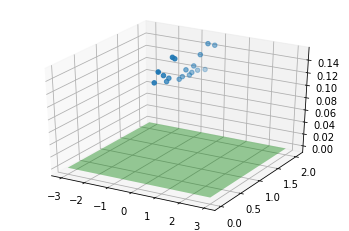

In [22]:
plotPoints(trainset)

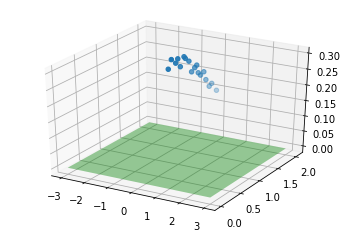

In [23]:
plotPoints(trainset2)

In [24]:
x = gettingX(1/60,1/3,1/60)
print(len(x))

20


In [25]:
thetaX = [random.uniform(-1,1),random.uniform(-1,1)]
linearRegression(a,x,dataset[0],thetaX,err)

1997
0.000999734332046321


In [26]:
thetaY = [random.uniform(0,2),random.uniform(0,2)]
linearRegression(a,x,dataset[1],thetaY,err)

2178
0.0009986300898879104


In [27]:
thetaZ = [random.random(),random.random()]
linearRegression(a,x,dataset[2],thetaZ,0.0001)

2852
9.999869967820452e-05


In [28]:
Xline = []
Yline = []
Zline = []
for i in x:
    Xline.append(linearH(thetaX,i))
    Yline.append(linearH(thetaY,i))
    Zline.append(linearH(thetaZ,i))

In [29]:
print(Xline)

[-0.3164741044141283, -0.3598230794012457, -0.40317205438836307, -0.44652102937548044, -0.48987000436259776, -0.5332189793497151, -0.5765679543368325, -0.6199169293239499, -0.6632659043110672, -0.7066148792981846, -0.749963854285302, -0.7933128292724193, -0.8366618042595367, -0.8800107792466542, -0.9233597542337715, -0.9667087292208888, -1.0100577042080063, -1.0534066791951235, -1.096755654182241, -1.1401046291693584]


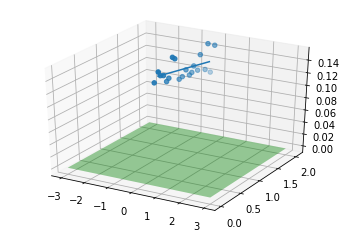

In [30]:
plotPolynom(dataset,Xline,Yline,Zline)

In [31]:
thetaX2 = [random.uniform(-1,1),random.uniform(-1,1)]
linearRegression(a,x,dataset2[0],thetaX2,err)

1435
0.0009985047907680408


In [32]:
thetaY2 = [random.uniform(0,2),random.uniform(0,2)]
linearRegression(a,x,dataset2[1],thetaY2,err)

2459
0.0009985870516095428


In [33]:
thetaZ2 = [random.random(),random.random()]
linearRegression(a,x,dataset2[2],thetaZ2,0.0001)

15001
0.0001459950000010355


In [34]:
Xline2 = []
Yline2 = []
Zline2 = []
for i in x:
    Xline2.append(linearH(thetaX2,i))
    Yline2.append(linearH(thetaY2,i))
    Zline2.append(linearH(thetaZ2,i))

In [35]:
print(Xline2)

[-0.1997325034745625, -0.21701209173053138, -0.23429167998650027, -0.25157126824246917, -0.26885085649843804, -0.2861304447544069, -0.30341003301037583, -0.3206896212663447, -0.3379692095223136, -0.35524879777828244, -0.37252838603425137, -0.38980797429022024, -0.40708756254618916, -0.42436715080215803, -0.4416467390581269, -0.45892632731409577, -0.47620591557006475, -0.4934855038260336, -0.5107650920820025, -0.5280446803379714]


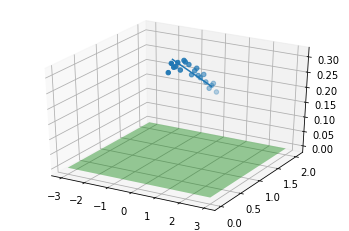

In [36]:
plotPolynom(dataset2,Xline2,Yline2,Zline2)